# H02A5A Computer Vision Project - Incisor Segmentation

## Imports

In [1]:
%matplotlib inline
import numpy as np
import cv2
from incisorseg.dataset import Dataset,LeaveOneOutSplitter,load_image,load_landmark
from incisorseg.utils import *
from asm.shape import Shape
from asm.shapemodel import ShapeModel
from asm.greymodel import GreyModel

## Reading the dataset

In [2]:
data = Dataset('../data/')

## Sample plots

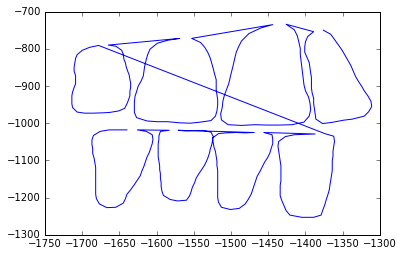

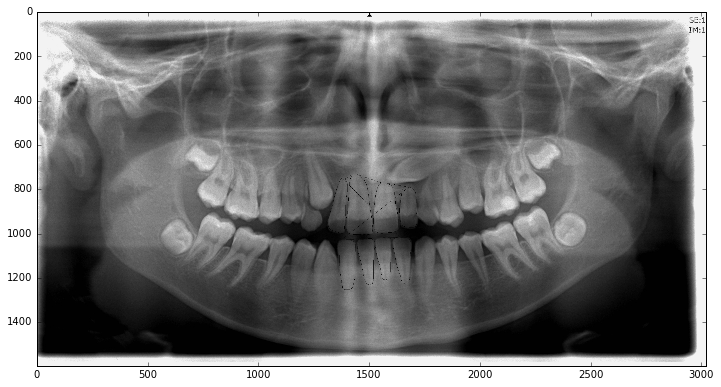

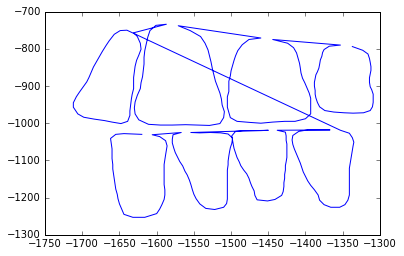

(1597, 3023)


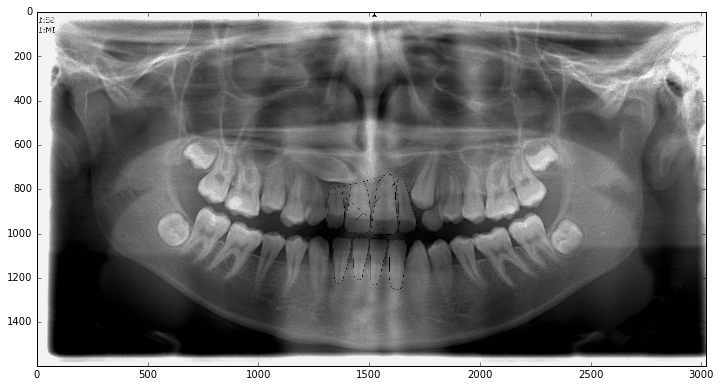

In [3]:
img,mimg = data.get_training_images([0])
l,ml = data.get_training_image_landmarks([0],Dataset.ALL_TEETH)
lc,mlc = data.get_training_image_landmarks([0],Dataset.ALL_TEETH,True)
plot_shapes(lc)
imshow2(overlay_shapes_on_image(img[0],lc))
plot_shapes(mlc)
imshow2(overlay_shapes_on_image(mimg[0],mlc))
print img[0].shape

## Shape Model
All 8 teeth

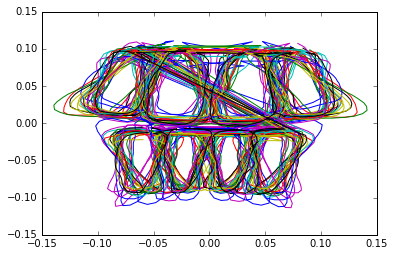

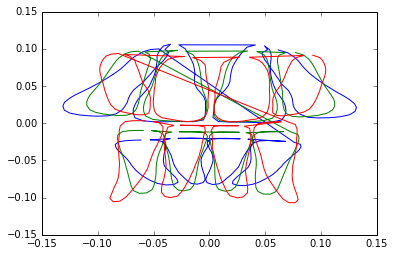

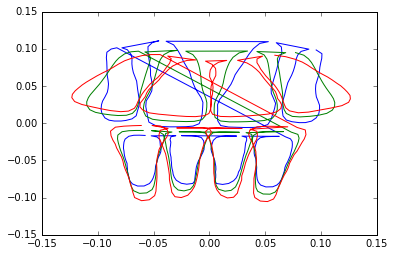

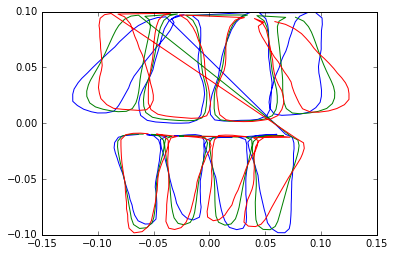

In [4]:
lc,mlc = data.get_training_image_landmarks(Dataset.ALL_TRAINING_IMAGES,Dataset.ALL_TEETH,True)
landmarks = lc + mlc
model = ShapeModel(landmarks)
plot_shapes(model.aligned_shapes())
#plot_shapes([model.mean_shape()])
plot_shapes(model.mode_shapes(1))
plot_shapes(model.mode_shapes(2))
plot_shapes(model.mode_shapes(3))

### Some edge detection and pyramids

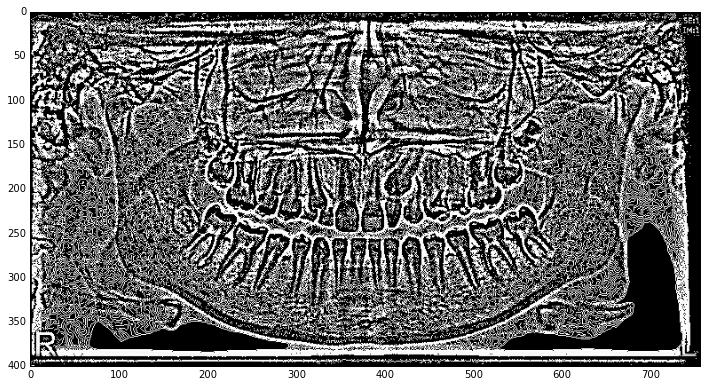

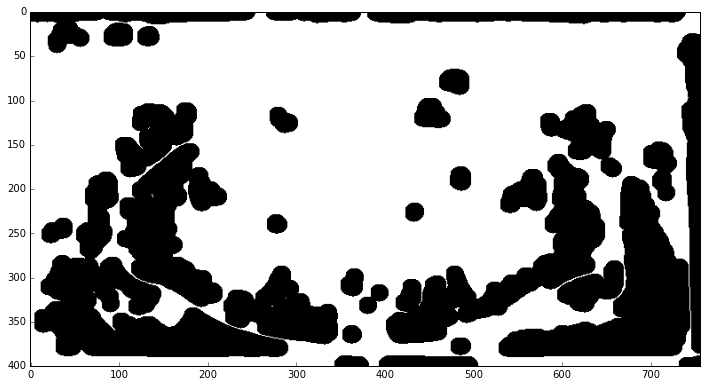

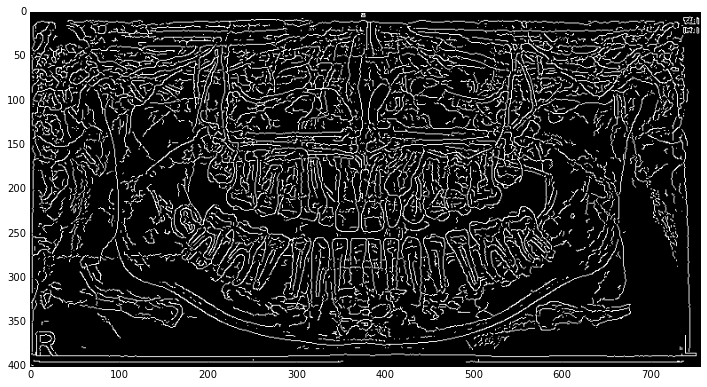

In [5]:
sample = cv2.pyrDown(cv2.pyrDown(data.get_extra_images([0])[0]))#[650:1300,1200:1800]
imshow2(cv2.Laplacian(cv2.bilateralFilter(sample,5,30,30),2))
imshow2(cv2.morphologyEx(cv2.Canny(cv2.bilateralFilter(sample,9,30,30),20,20),cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20))))
imshow2(cv2.Canny(cv2.bilateralFilter(sample,5,30,30),10,20))

#### Shape normals

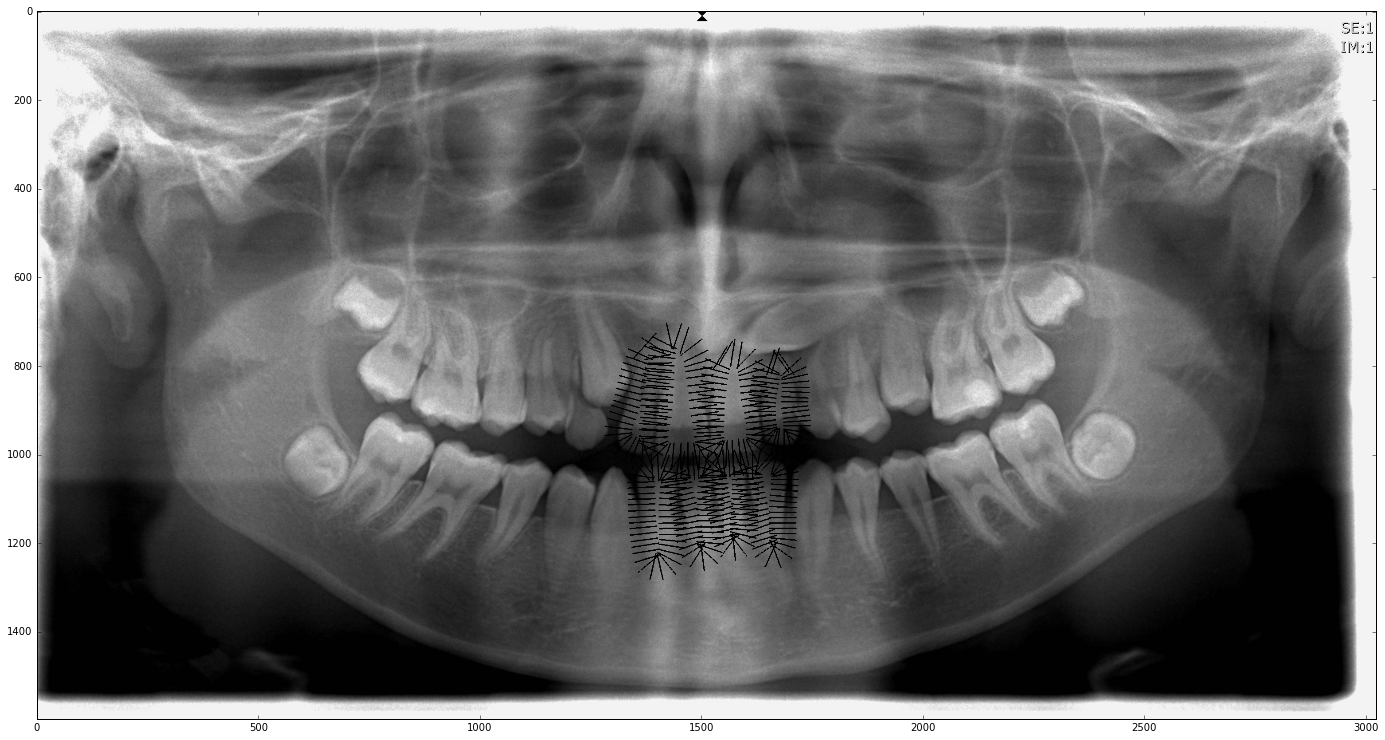

In [6]:
img,_ = data.get_training_images([0])
l,_ = data.get_training_image_landmarks([0],Dataset.ALL_TEETH,combine=True)
shape = l[0]
normal_pixels = []
for i in range(shape.size()):
    generator = shape.get_normal_at_point_generator(i, 2)
    for increment in range(-30, 31):
        coordinates = np.int32(np.round(generator(increment)))
        normal_pixels.append(coordinates.tolist())
imshow2(overlay_points_on_image(img[0],normal_pixels),width=24,height=24)

#### Grey Level pixels for the shape normals

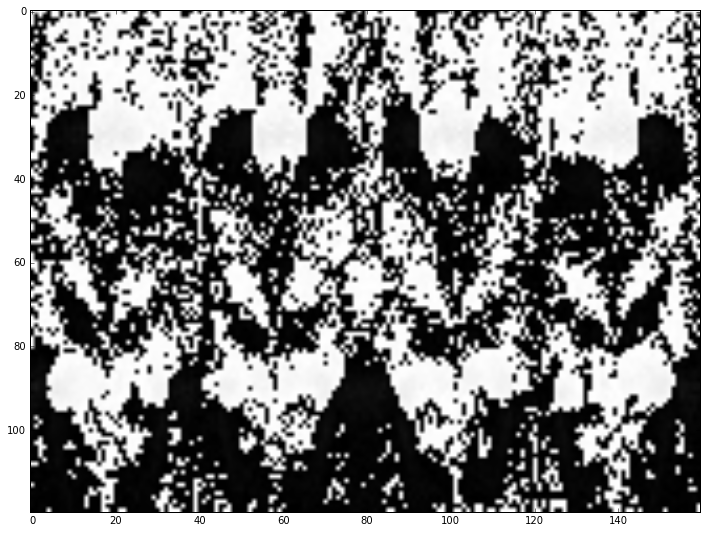

In [7]:
img,mimg = data.get_training_images(Dataset.ALL_TRAINING_IMAGES)
l,ml = data.get_training_image_landmarks(Dataset.ALL_TRAINING_IMAGES,Dataset.ALL_TEETH,combine=True)
images = img + mimg
shapes = l+ml
greymodel = GreyModel(images,shapes,number_of_pixels=30,normalize=True,use_gradient=True)
img = np.array([greymodel.get_point_grey_model(point_index).mean() for point_index in range(greymodel.size())])
img = np.concatenate((img[:][:160],img[:][160:]),axis=1)
imshow2(np.uint8(np.round(100*img.T),width=24,height=24))

#### Fun with pyramids

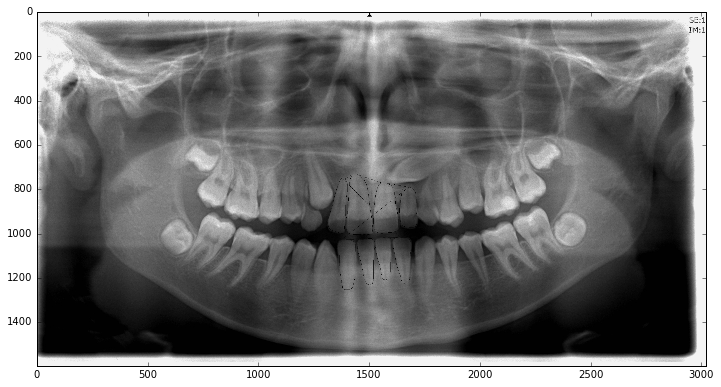

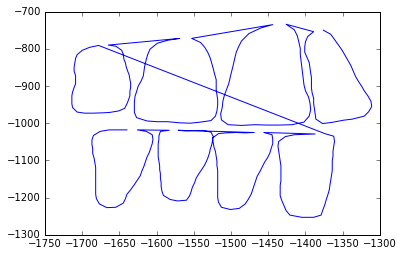

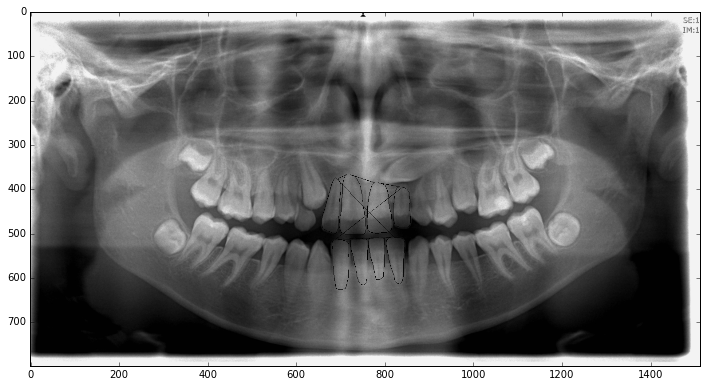

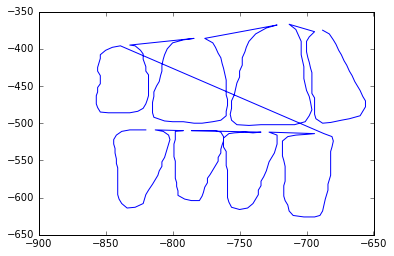

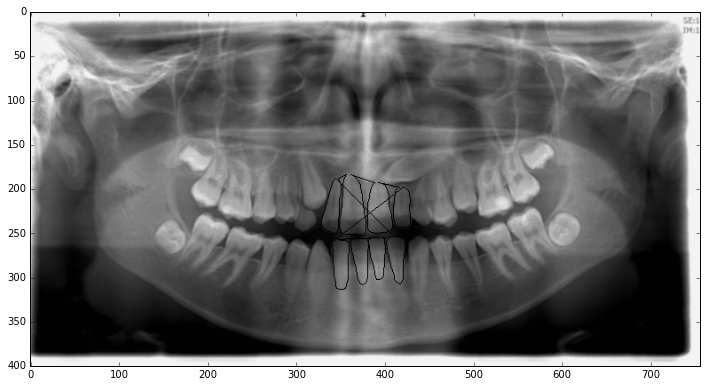

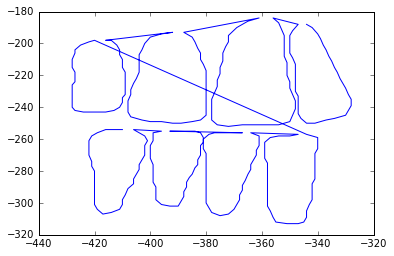

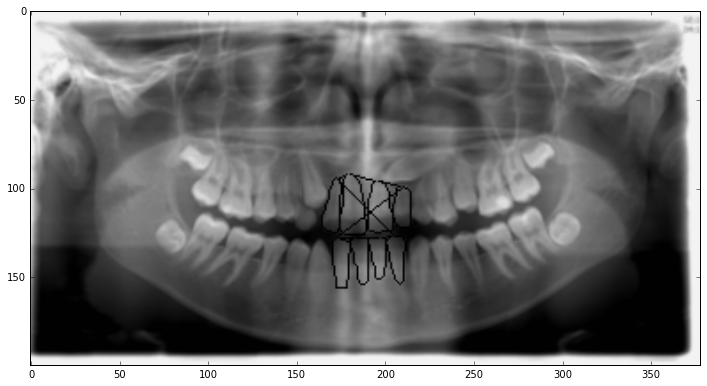

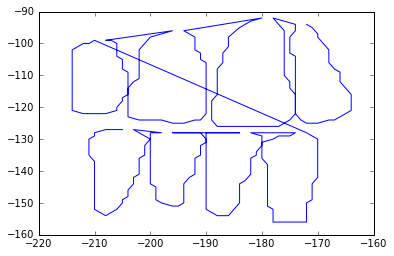

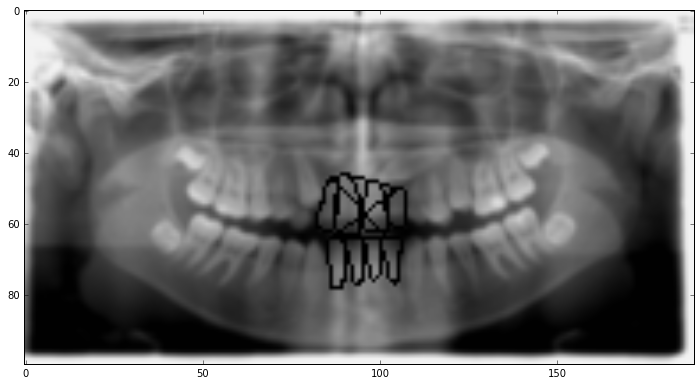

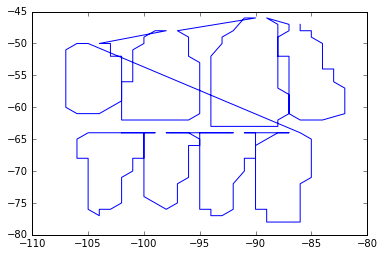

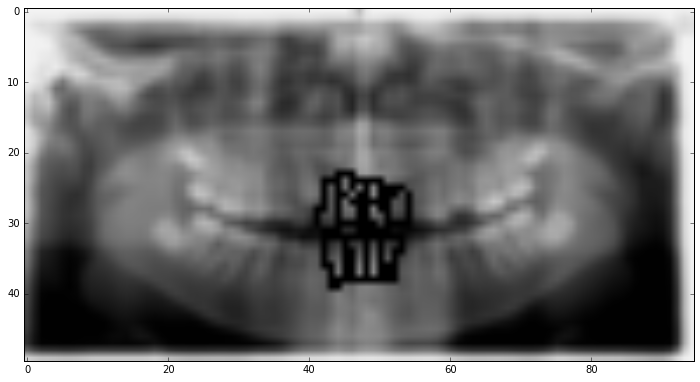

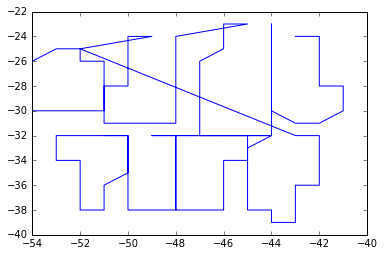

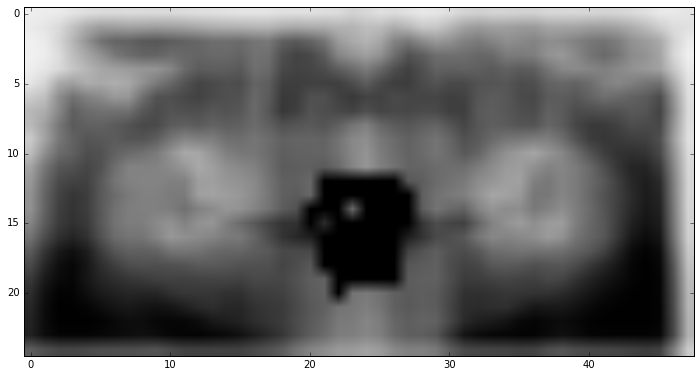

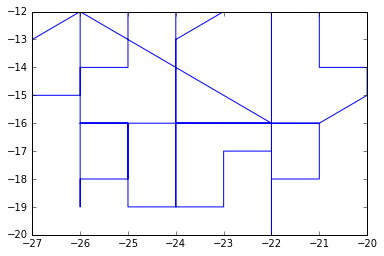

In [8]:
pimg = images[0]
shape = shapes[0]
for i in range(7):
    imshow2(overlay_shapes_on_image(pimg,[shape]))
    plot_shapes([shape])
    pimg = cv2.pyrDown(pimg)
    shape = shape.pyr_down()

#### Leave 1 out CV

In [9]:
for split in LeaveOneOutSplitter(data):
    training_images,training_landmarks,training_segmentations = split.get_training_set()
    test_image,test_landmark,test_segmentation = split.get_test_example()
    print split.get_dice_error_on_test(test_landmark)
    print split.get_dice_error_on_test(test_landmark,True)

0.720707254052
1.0
0.669511433775
1.0
0.729179738404
1.0
0.637585157835
1.0
0.709117801352
1.0
0.729491151966
1.0
0.724374616493
1.0
0.77594077993
1.0
0.739836868925
1.0
0.688420985772
1.0
0.746843293974
1.0
0.742366518199
1.0
0.73442359028
1.0
0.74423645432
1.0
0.71908182386
1.0
0.663929844849
1.0
0.724063927488
1.0
0.626929818866
1.0
0.706354587421
1.0
0.726144010536
1.0
0.719348130544
1.0
0.762255186612
1.0
0.739087421277
1.0
0.682712685437
1.0
0.741636994003
1.0
0.731514366958
1.0
0.730152073479
1.0
0.735166400826
1.0
